**Email Classification Project (Mouez yazidi)**


Most of us should be familiar with spam emails.

Typically, spam is sent for commercial purposes. It can be sent in massive volume by botnets, networks of infected computers. Therefore, spam email filtering is an essential feature for email services such as Outlook and Gmail. Services providers are extensively using Machine learning techniques to filter and classify them successfully.

Bellongs this techniques we find NLP, which is a subfield of AI that permits machines to control human natural languages. NLP has been taken advantage of in many fields. In this Project, we will be going through the means of ordering an email whether it is a spam or not by utilizing NLP procedures.
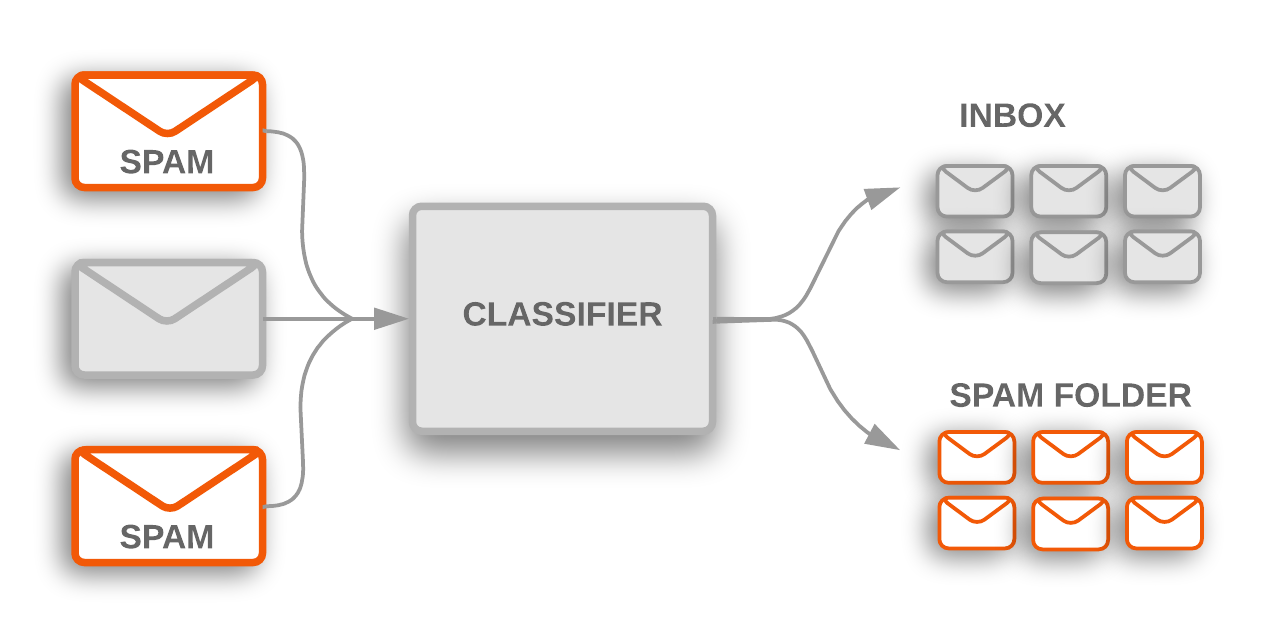

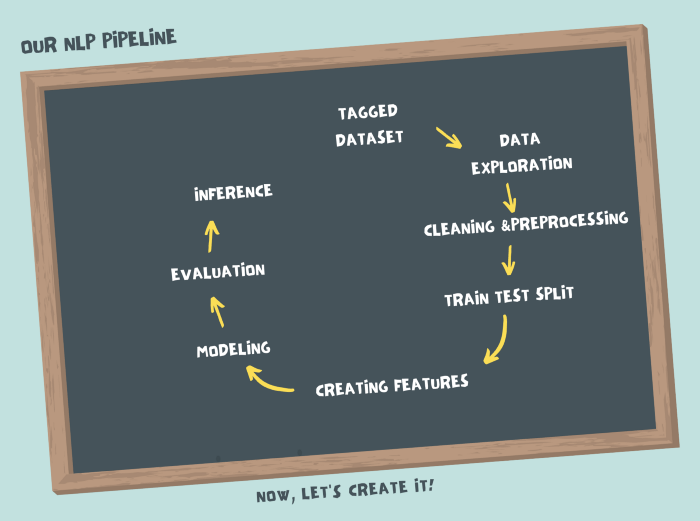

#**Import libaries**

In [ ]:
#for import the data
import pandas as pd
import numpy as np

# for the visualisation 
import matplotlib.pyplot as plt
import seaborn as sns

#for the text pre-processing (text cleaning)
import nltk
nltk.download('punkt')
import re #regular expression
import string
from nltk.tokenize import word_tokenize # word tokenization
from nltk.stem import PorterStemmer # word stemming

#for feature extraction ( vectorazation)
from sklearn.feature_extraction.text import CountVectorizer

#for split the data into train and test
from sklearn.model_selection import train_test_split

#for the model training
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

#for the model evaluation
from sklearn.metrics import confusion_matrix,classification_report

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

#**Import Data**

In [ ]:
"""
chardet is a library  detect the most probable character encoding in a text file
"""
import chardet
with open('spam.csv', 'rb') as f:
    result = chardet.detect(f.read())
data = pd.read_csv('spam.csv', encoding=result['encoding'])

In [ ]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives around here though",NaN,NaN,NaN


In [ ]:
#take the text and the label columns & rename each column
data=data[['v1','v2']]
data = data.rename(columns={'v1':'label','v2':'text'})
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [ ]:
#Drop Duplicated Rows
data = data.drop_duplicates()

#**EDA**

In [ ]:
data.shape
#5169 rows & 2 columns

(5169, 2)

In [ ]:
data.isna().sum()
#we don't have missing data

label    0
text     0
dtype: int64

ham     4516
spam     653
Name: label, dtype: int64
ham : 87.37 %
spam : 12.63 %


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


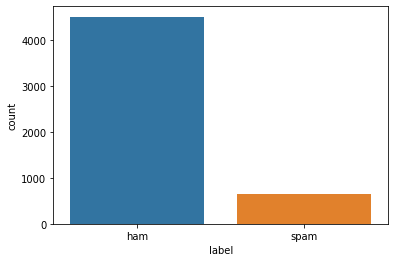

In [ ]:
s=data.label.value_counts()
# so we have 4825 ham and 747 spam
print(s)
print('ham :',round(s[0]/len(data)*100,2),'%')
print('spam :',round(s[1]/len(data)*100,2),'%')
sns.countplot(data['label'])
#we have imballaced data 
#86.95% of the data are ham emails and just 13.41 is spam 
#so the problem present here is that the model will learn with ham much more then spam

In [ ]:
# defne new column named 'email_length' that contain the length of each email in the dataset
data["email_length"]=data["text"].apply(len)

In [ ]:
print('the max length email is:',data['email_length'].max())
print('the min length email is:',data['email_length'].min())
print('the avg length email is:',data['email_length'].mean())

the max length email is: 910
the min length email is: 2
the avg length email is: 78.97794544399304


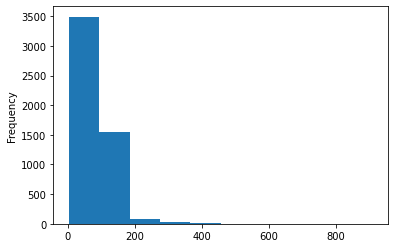

In [ ]:
#display the distribution of email's length
data['email_length'].plot.hist()

In [ ]:
# delete all emails that its length not in [4:250]
data = data[data.email_length<251]
data = data[data.email_length>3]

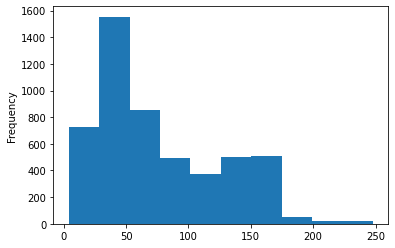

In [ ]:

data['email_length'].plot.hist()

In [ ]:
#shape of new data
data.shape

(5106, 3)

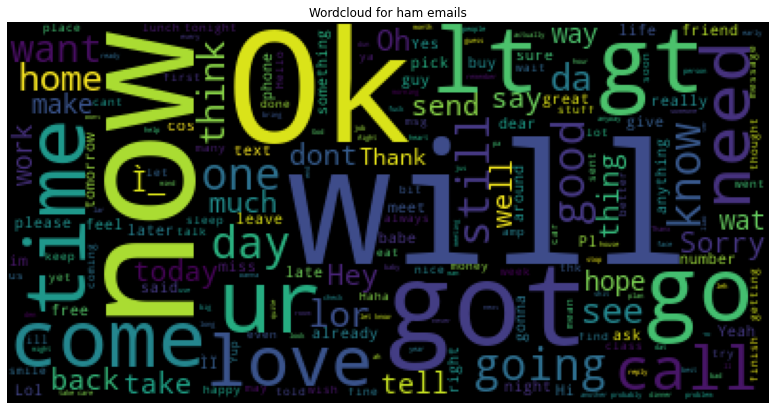

In [ ]:
from wordcloud import WordCloud,STOPWORDS
text = list(data[data["label"] == 'ham'].text.values)
wordcloud = WordCloud(stopwords=STOPWORDS).generate(str(text))
plt.figure(figsize = (15, 7))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Wordcloud for ham emails')
plt.show()

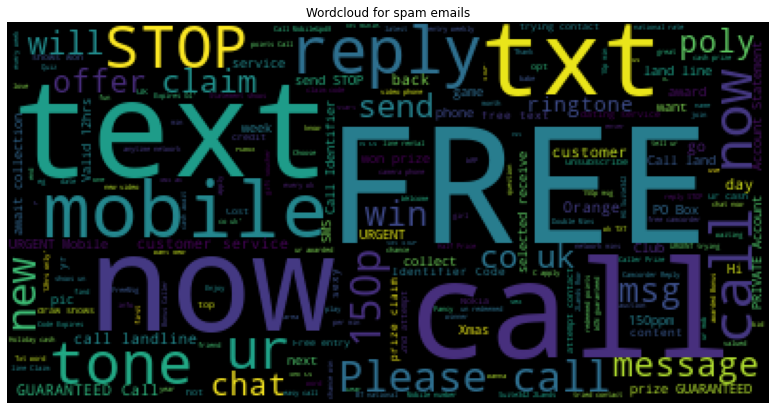

In [ ]:
from wordcloud import WordCloud,STOPWORDS
text = list(data[data["label"] == 'spam'].text.values)
wordcloud = WordCloud(stopwords=STOPWORDS).generate(str(text))
plt.figure(figsize = (15, 7))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Wordcloud for spam emails')
plt.show()

#**Text Pre-Processing**

###**Text Cleaning**

In [ ]:
#Clean Text
def clean_text(data):
  # convert catacter to lowercase
  data['clean_text']=data['text'].str.lower()
  #remove URLS
  data['clean_text'] = data['clean_text'].apply(lambda elem:re.sub(r"http\S+", "", elem))
  #remove ponctuation
  data['clean_text'] = data['clean_text'].apply(lambda elem:re.sub(r"[^\w\s]", "", elem))
  #remove 
  data['clean_text'] = data['clean_text'].apply(lambda elem:re.sub(r'/n',"",elem))
  #remove degits
  data['clean_text'] = data['clean_text'].apply(lambda elem:re.sub(r'\d+',"",elem))
  #remove multiple spaces
  data['clean_text'] = data['clean_text'].apply(lambda elem:re.sub(r'\s+'," ",elem))
  #remove single caracter
  data['clean_text'] = data['clean_text'].apply(lambda elem:re.sub(r'\s+[a-zA-Z]\s+'," ",elem))
  return data

In [ ]:
data = clean_text(data)

###**Remove StopWords**
Stop words are a set of commonly used words in a language. Examples of stop words in English are “a”, “the”, “is”, “are” and etc. Stop words are commonly used in Text Mining and Natural Language Processing (NLP) to eliminate words that are so commonly used that they carry very little useful information.

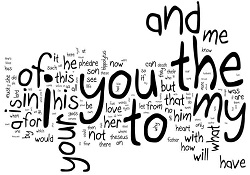

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

In [ ]:
def remove_stop_words(text):
  stopW=stopwords.words('english')
  s=""
  for i in text.split():
    if i not in stopW:
        s=s+i+" "
  return s

In [ ]:
data['clean_text']=data['clean_text'].apply(lambda x:remove_stop_words(x))

###**Stemming and Lemmatization**
This can be done using Stemming or Lemmatization.

*   **Stemming**: It uses a rule-based system to bring a word to its 
canonical form. Like removing ‘ing’ from ‘dancing’ to form ‘danc’ or ‘ticked’ to ‘tick’. As you can see, stemming might not produce a dictionary word all the time after normalization.

*  **Lemmatizer**: It is a more intelligent system that keeps a dictionary on its side while normalizing words. Hence it will normalize ‘dancing’ to ‘dance’ & not ‘danc’ as done in stemming.

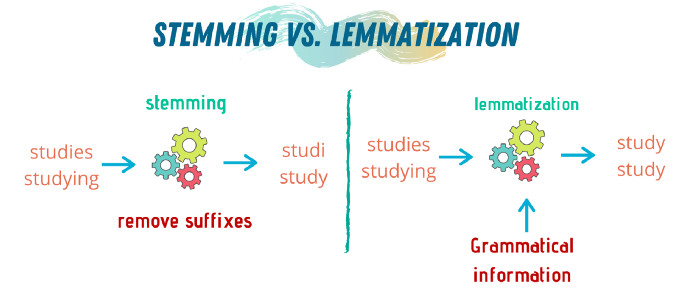

In [ ]:
def stem(ch):
  stem = PorterStemmer()
  return " ".join([stem.stem(i) for i in ch.split()])

#apply the stem function to each row in the dataframe 
data['clean_text'] = data['clean_text'].apply(lambda x:stem(x))

In [ ]:
print('text before cleaning :',data['text'][0])
print('text after cleaning :',data['clean_text'][0])

text before cleaning : Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
text after cleaning : go jurong point crazi avail bugi great world la buffet cine got amor wat


In [ ]:
#Convert label column from categoric to numeric
# Spam --> 1 / ham --> 0
data['label'] = data['label'].apply(lambda x:1 if x=='spam' else 0)

# **Feature Extraction ( Word Vector Using Bag Of Word *BOW*)**

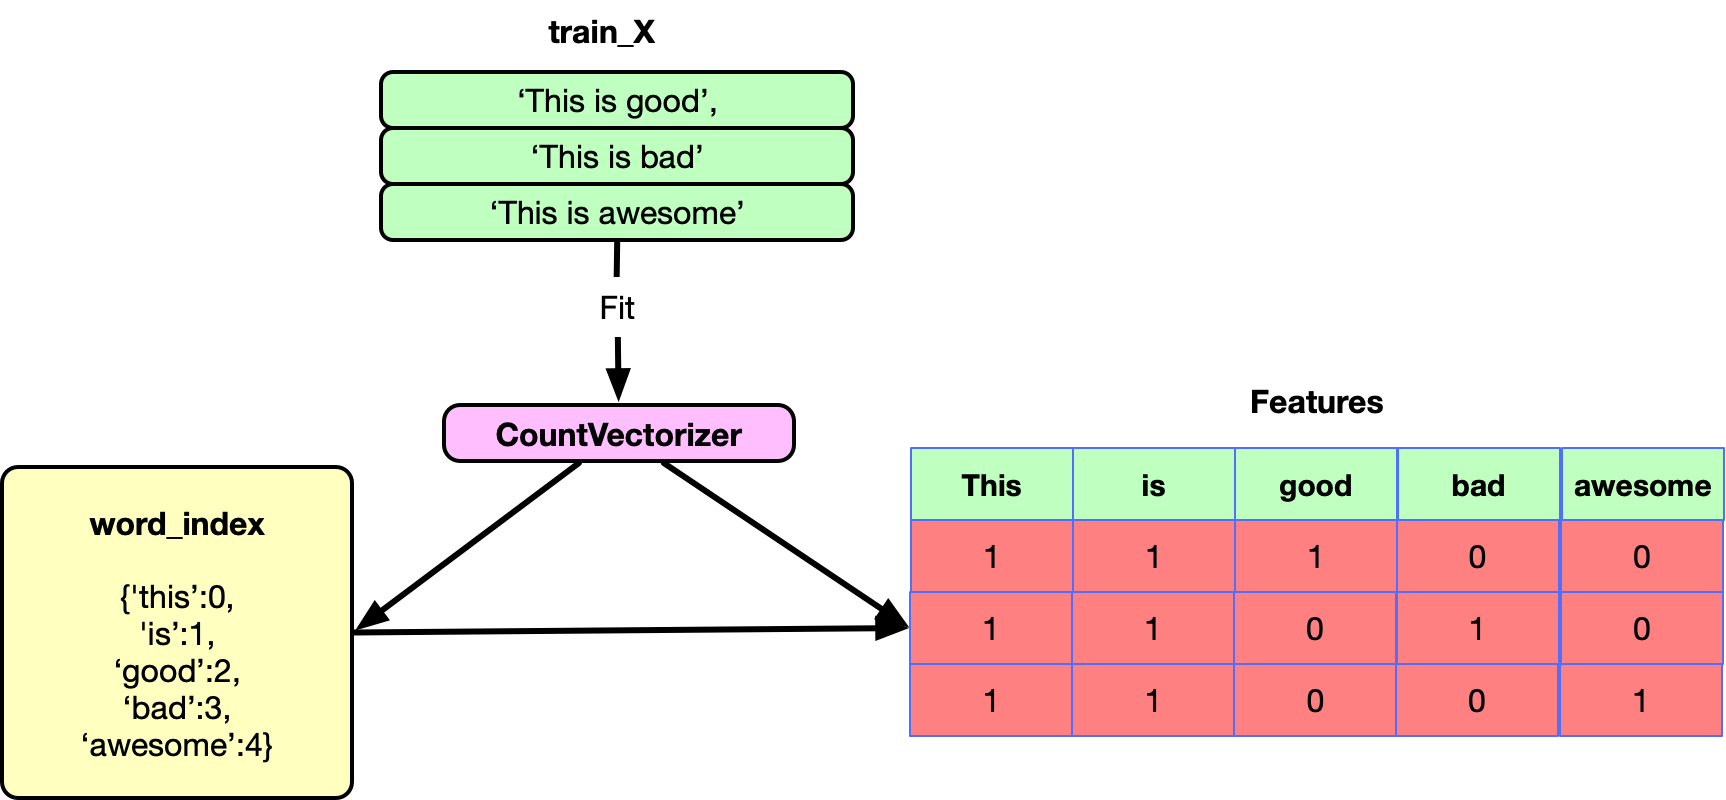

In [ ]:
"""
 CountVectorizer creates a dictionary containing the occurrence number of tokens
"""
#convert text to vector (using Count Vectorizer)
count_vect = CountVectorizer()
X= count_vect.fit_transform(data['clean_text'])

In [ ]:
print(X.shape)

(5106, 6845)


In [ ]:
#devide the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, data['label'], test_size=0.1, random_state=0)

# **Model training & evaluation**

###**Naive Bayes Classifier**

In [ ]:
#initialize the Naive Bayes model
NB = MultinomialNB()
#train the model
NB.fit(X_train,y_train)

MultinomialNB()

In [ ]:
#model accuracy
print('Model accuracy for Naive Bayes : ',round(NB.score(X_test,y_test),2)*100,"%")

Model accuracy for Naive Bayes :  98.0 %


In [ ]:
y_pred = NB.predict(X_test)

 **Confusion Matrix**
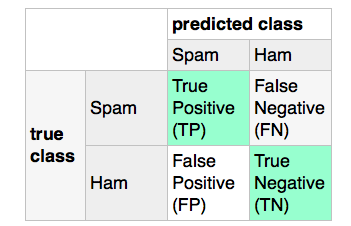

Text(0.5, 257.44, 'Predicted label')

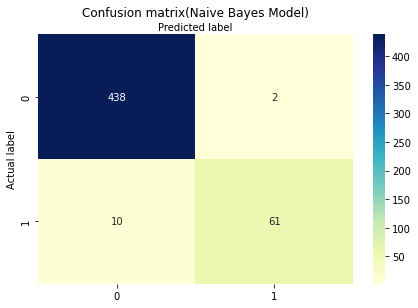

In [ ]:
conf = confusion_matrix(y_pred,y_test)
class_names=['spam','ham']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix(Naive Bayes Model)', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [ ]:
print(classification_report(y_pred,y_test))
#Precision — What percent of your predictions were correct? (Precision = TP/(TP + FP))
#Recall — What percent of the positive cases did you catch? (Recall = TP/(TP+FN))
#F1 score — What percent of positive predictions were correct? (F1 Score = 2*(Recall * Precision) / (Recall + Precision))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       440
           1       0.97      0.86      0.91        71

    accuracy                           0.98       511
   macro avg       0.97      0.93      0.95       511
weighted avg       0.98      0.98      0.98       511



###**Random Forest Classifier**

In [ ]:
#intialize the Random Forest Model
RF = RandomForestClassifier()
#train the model
RF.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
#model accuracy 
print('Model accuracy for Random Forest : ',round(RF.score(X_test,y_test),2)*100,"%")

Model accuracy for Random Forest :  97.0 %


In [ ]:
y_pred1= RF.predict(X_test)

Text(0.5, 257.44, 'Predicted label')

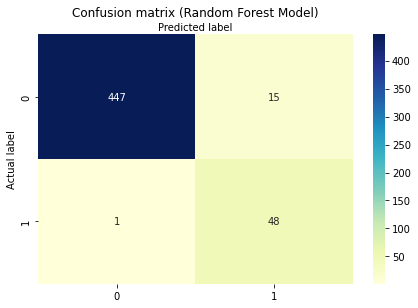

In [ ]:
conf1 = confusion_matrix(y_pred1,y_test)
class_names=['spam','ham']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf1), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix (Random Forest Model)', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print(classification_report(y_pred1,y_test))
#Precision — What percent of your predictions were correct? (Precision = TP/(TP + FP))
#Recall — What percent of the positive cases did you catch? (Recall = TP/(TP+FN))
#F1 score — What percent of positive predictions were correct? (F1 Score = 2*(Recall * Precision) / (Recall + Precision))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       462
           1       0.76      0.98      0.86        49

    accuracy                           0.97       511
   macro avg       0.88      0.97      0.92       511
weighted avg       0.98      0.97      0.97       511

